In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
import seaborn as sns

# Load the data
path = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/DataMining/Student_performance_data%20_.csv'
df = pd.read_csv(path)

# Check for null values and duplicates
null_values = df.isnull().sum().sum()
nan_values = df.isna().sum().sum()
duplicate_values = df.duplicated().sum()

print(f"Duplicate values: {duplicate_values}")
print(f"Null values: {null_values}")
print(f"NaN values: {nan_values}")

# Print column names
columns = df.columns

absences = df['Absences']
gpa = df['GPA']
studyTime = df['StudyTimeWeekly']
# plt.figure(figsize=(10, 6))
# plt.scatter(gpa, absences, color='blue', alpha=0.6)
# plt.grid(True)
# plt.figure(figsize=(10, 6))
# plt.scatter(gpa, studyTime, color='blue', alpha=0.6)
# plt.xlabel('GPA')
# plt.ylabel('Study Time')
# plt.title('GPA vs Study Time')
# plt.grid(True)
# print(df['StudyTimeWeekly'])

# One hot encoding
#Dropping irrelevant columns
df = df.drop(['StudentID'], axis=1)

columns = df.columns
print(columns)

Duplicate values: 0
Null values: 0
NaN values: 0
Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')


In [2]:
# Map numeric values for one hot encoding
ethnicity_mapping = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parentalInvolvment_mapping = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
parentalEducation_mapping = {0: 'None', 1: 'High School', 2: 'Some College', 3: 'Bachelors', 4: 'Higher'}
gender_mapping = {0: 'Male', 1: 'Female'}
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df['ParentalSupport'] = df['ParentalSupport'].map(parentalInvolvment_mapping)
df['ParentalEducation'] = df['ParentalEducation'].map(parentalEducation_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
# One-hot encode the Ethnicity column
df = pd.get_dummies(df, columns=['Ethnicity', 'ParentalSupport','ParentalEducation', 'Gender'], dtype=int)
# Print the updated columns
print(df.columns)


Index(['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular',
       'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian',
       'Ethnicity_Other', 'ParentalSupport_High', 'ParentalSupport_Low',
       'ParentalSupport_Moderate', 'ParentalSupport_None',
       'ParentalSupport_Very High', 'ParentalEducation_Bachelors',
       'ParentalEducation_High School', 'ParentalEducation_Higher',
       'ParentalEducation_None', 'ParentalEducation_Some College',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


## Data Visualizations

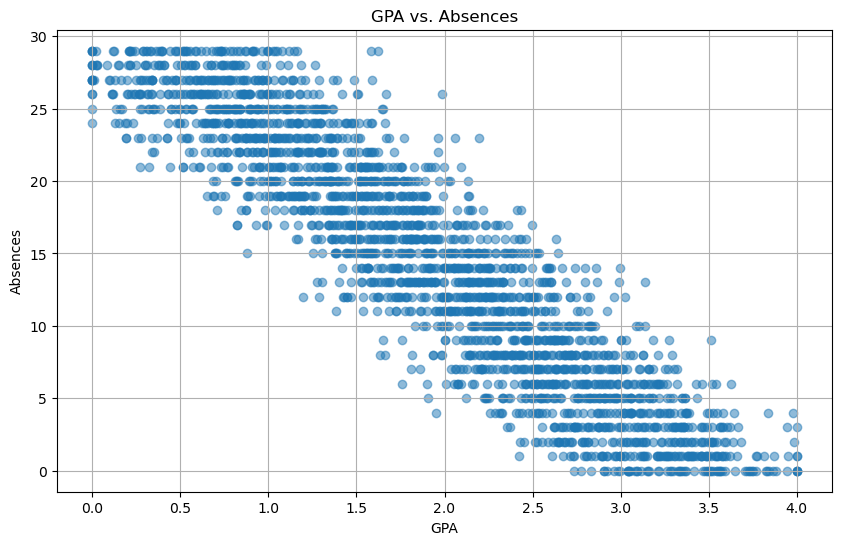

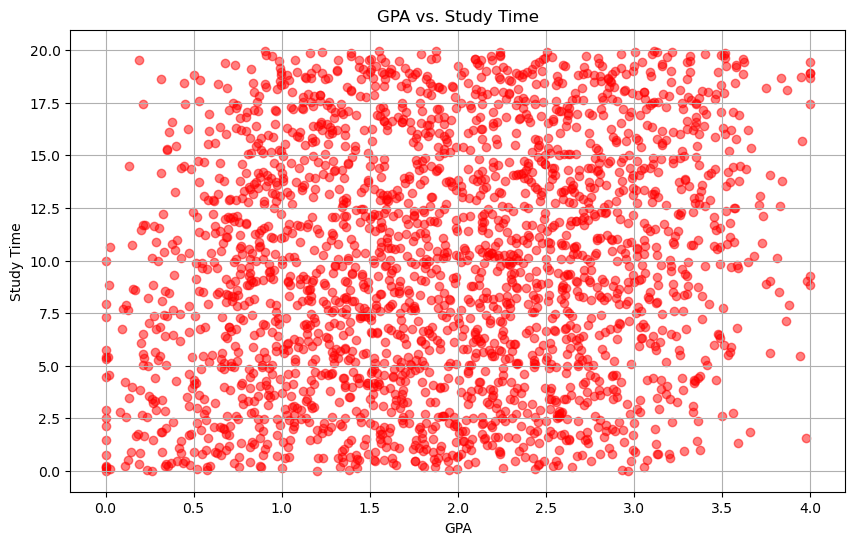

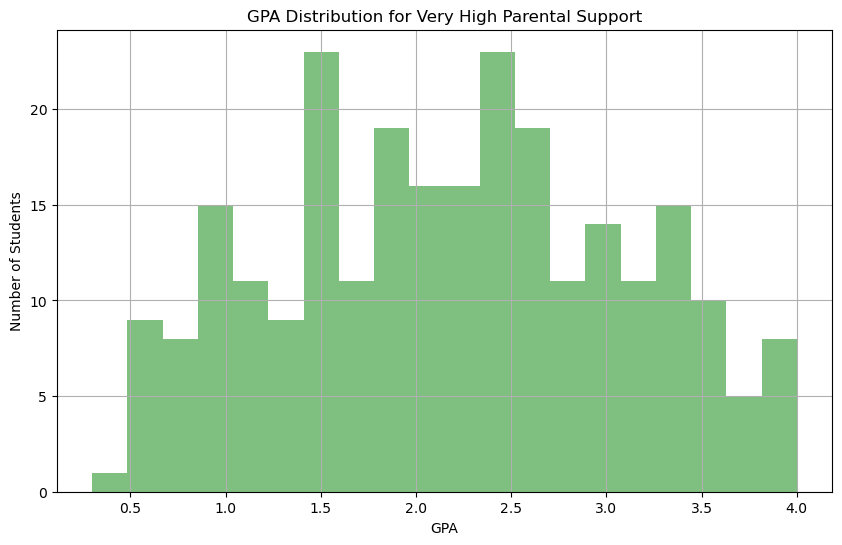

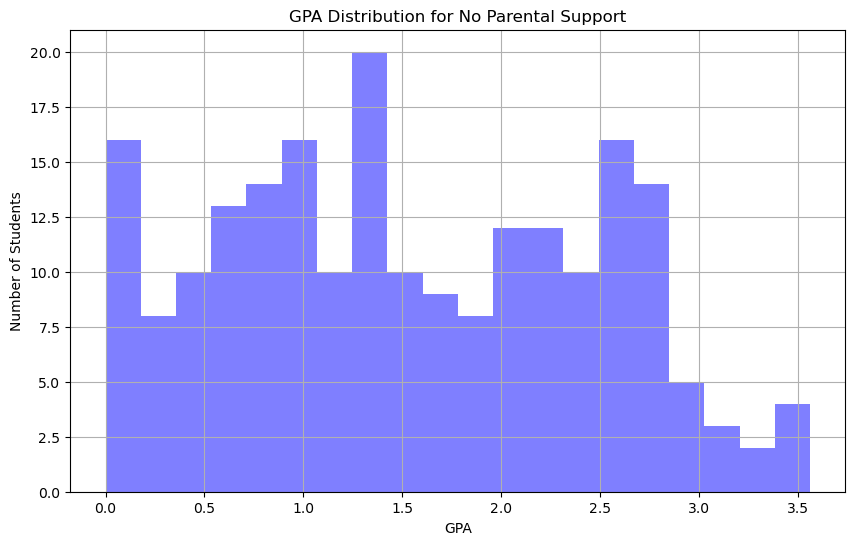

In [3]:
# GPA vs Number of Absemces
gpa = df['GPA']
absences = df['Absences']
plt.figure(figsize=(10, 6))
plt.scatter(gpa, absences, alpha=0.5)
plt.title('GPA vs. Absences')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.grid(True)
plt.show()

# GPA vs Study Time
studyTime = df['StudyTimeWeekly']
plt.figure(figsize=(10, 6))
plt.scatter(gpa, studyTime, alpha=0.5, color='red')
plt.title('GPA vs. Study Time')
plt.xlabel('GPA')
plt.ylabel('Study Time')
plt.grid(True)
plt.show()

# Very High Parental Support vs GPA
high_parental_support = df[df['ParentalSupport_Very High'] == 1]
gpa = high_parental_support['GPA']
plt.figure(figsize=(10, 6))
plt.hist(gpa, bins=20, color='green', alpha=0.5)
plt.title('GPA Distribution for Very High Parental Support')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

# No Parental Support vs GPA
no_parental_support = df[df['ParentalSupport_None'] == 1]
gpa = no_parental_support['GPA']
plt.figure(figsize=(10, 6))
plt.hist(gpa, bins=20, color='blue', alpha=0.5)
plt.title('GPA Distribution for No Parental Support')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()



Feature ranking:
1. feature 2 (0.406311)
2. feature 1 (0.150237)
3. feature 0 (0.062001)
4. feature 4 (0.027954)
5. feature 5 (0.027105)
6. feature 3 (0.024912)
7. feature 6 (0.022202)
8. feature 10 (0.021335)
9. feature 21 (0.021323)
10. feature 7 (0.020442)
11. feature 18 (0.020297)
12. feature 22 (0.019429)
13. feature 23 (0.018944)
14. feature 8 (0.018554)
15. feature 9 (0.017797)
16. feature 14 (0.017001)
17. feature 12 (0.016885)
18. feature 17 (0.015825)
19. feature 13 (0.014573)
20. feature 16 (0.014327)
21. feature 20 (0.013551)
22. feature 11 (0.011699)
23. feature 15 (0.009966)
24. feature 19 (0.007333)


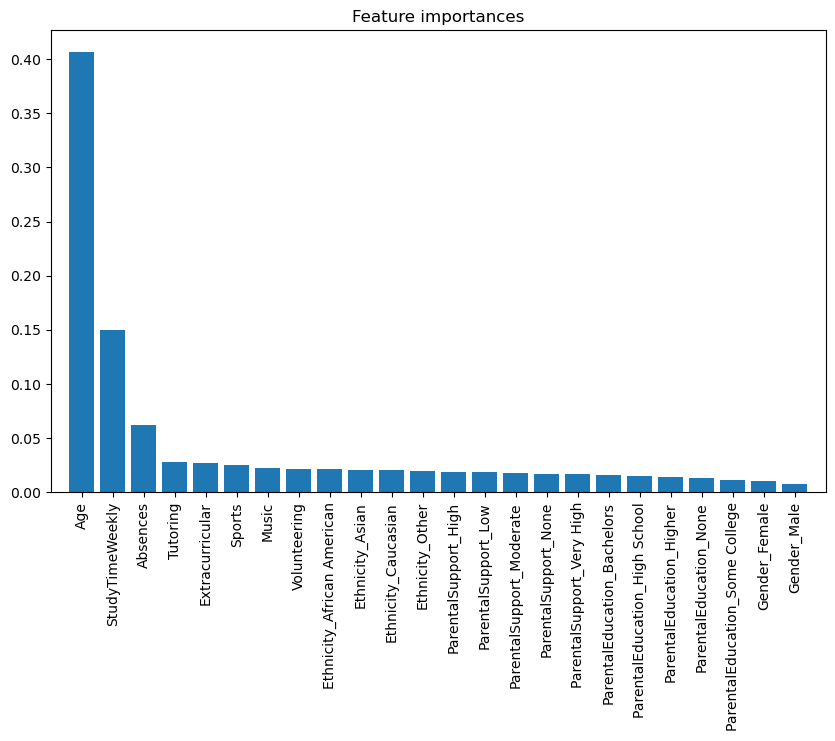

['Absences', 'StudyTimeWeekly', 'Age', 'Extracurricular', 'Sports', 'Tutoring', 'Music', 'Ethnicity_Caucasian', 'ParentalEducation_Some College', 'Volunteering', 'ParentalEducation_High School', 'Gender_Female', 'Gender_Male', 'Ethnicity_African American', 'Ethnicity_Asian', 'ParentalSupport_Moderate', 'ParentalSupport_High', 'ParentalEducation_Bachelors', 'ParentalSupport_Low', 'ParentalSupport_Very High']


In [4]:
scaler = StandardScaler()
df = df.drop(['GPA'], axis=1)

df[['Age', 'StudyTimeWeekly', 'Absences']] = scaler.fit_transform(df[['Age', 'StudyTimeWeekly', 'Absences']])

#Training Features are X and out target is Y
X = df.drop(columns=['GradeClass'])
Y = df['GradeClass']
# Calculate the most important features
from sklearn.ensemble import RandomForestClassifier
import numpy as np
model = RandomForestClassifier()
model.fit(X, Y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

threshold = 0.95
# Selecting the top features that contribute to 95% of the importance
top_features = []
for i in range(X.shape[1]):
    if np.sum(importances[indices[:i]]) < threshold:
        top_features.append(features[indices[i]])
    else:
        break
print(top_features)

In [ ]:
#Select the top features
X = X[top_features]